# Assignment

In this assignment, we want to implement cross-validation for logistic regression. Cross-validation is a powerful technique for model selection (such as when choosing the right hyper-parameters), especially when the data size is not very large. The goal of this assignment is to first implement cross-validation and compare it to a baseline model (with no cross-validation).

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
%matplotlib inline
random_state = 0

### Get Data
Read in `AmesFeatures.csv` which contains the processed data from the lecture.  This data file can be found in canvas.  If you want, you can generate this data file yourself by uncommenting the line `# AmesFeatures.to_csv('AmesFeatures.csv', index=False)` in file `Lesson_10_b_Student.ipynb`.  You may need to change the path below.  <br/><span style="color:red" float:right>[0 point]</span>

In [2]:
AmesFeatures = pd.read_csv('AmesFeatures.csv')
y = (AmesFeatures['SalePrice'] > 200000) & (AmesFeatures['SalePrice'] < 230000)
X = AmesFeatures.drop(columns=['Id', 'SalePrice'])
display(y.value_counts())
display(X.shape)
display(X)

False    1330
True      130
Name: SalePrice, dtype: int64

(1460, 91)

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y
0,60.0,8450.0,7.0,5.0,2003.0,2003.0,706.0,0.0,150.0,856.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,20.0,9600.0,6.0,8.0,1976.0,1976.0,978.0,0.0,284.0,1262.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,60.0,11250.0,7.0,5.0,2001.0,2002.0,486.0,0.0,434.0,920.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,70.0,9550.0,7.0,5.0,1915.0,1970.0,216.0,0.0,540.0,756.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,60.0,14260.0,8.0,5.0,2000.0,2000.0,655.0,0.0,490.0,1145.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60.0,7917.0,6.0,5.0,1999.0,2000.0,0.0,0.0,953.0,953.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1456,20.0,13175.0,6.0,6.0,1978.0,1988.0,790.0,163.0,589.0,1542.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1457,70.0,9042.0,7.0,9.0,1941.0,2006.0,275.0,0.0,877.0,1152.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1458,20.0,9717.0,5.0,6.0,1950.0,1996.0,49.0,1029.0,0.0,1078.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


Use some of the code from the lecture. 
- Split X and y into X_train, X_test, y_train, and y_test using `test_size = 0.30`.  You may want to use `random_state = 0` to make your results the same as others 
- Present the counts for False and True in y_train and y_test to verify the imbalanced data in your train and test sets
<br/><span style="color:red" float:right>[0 point]</span>

In [3]:
# Add code here to splt data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)
# Add code to present the imbalance of the class labels for both test and training


display(y_train.value_counts())
display(y_test.value_counts())



False    930
True      92
Name: SalePrice, dtype: int64

False    400
True      38
Name: SalePrice, dtype: int64

1. Train basic `LogisticRegression` classifier (repeat what was done in class)
 1. Train a model with `X_train` and `y_train`
 2. predict (hard baseline and soft) on training and test features with `.predict()` and `.predict_proba()`
 3. evaluate model using confusion matrix (`confusion_matrix`) and its metrics (`classification_report`)
 4. evaluate model using ROC and AUC of ROC
 5. comment on the model's usability. 
<br/><span style="color:red" float:right>[2 point]</span>

Here is the code for the logistic regression and seen in class. 

In [4]:
# Add code here to train the logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [5]:
# Add code to predict (hard and soft) on training and test features
y_train_pred = logreg.predict(X_train)
y_train_proba = logreg.predict_proba(X_train)[:,1]

y_test_pred = logreg.predict(X_test)
y_test_proba = logreg.predict_proba(X_test)[:,1]

Here you can see how unbalanced the two groups are. 

In [6]:
# Add code to evaluate predictions using confusion matrix and its metrics
from sklearn import metrics

cm_train = metrics.confusion_matrix(y_train, y_train_pred)
print('Confusion matrix based on training data:')
print(cm_train)
print('\nConfusion matrix as an accuracy measure (test data):')
cm_test = metrics.confusion_matrix(y_test, y_test_pred)
print(cm_test)



Confusion matrix based on training data:
[[929   1]
 [ 92   0]]

Confusion matrix as an accuracy measure (test data):
[[400   0]
 [ 38   0]]


In [7]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

       False       0.91      1.00      0.95       930
        True       0.00      0.00      0.00        92

    accuracy                           0.91      1022
   macro avg       0.45      0.50      0.48      1022
weighted avg       0.83      0.91      0.87      1022

              precision    recall  f1-score   support

       False       0.91      1.00      0.95       400
        True       0.00      0.00      0.00        38

    accuracy                           0.91       438
   macro avg       0.46      0.50      0.48       438
weighted avg       0.83      0.91      0.87       438



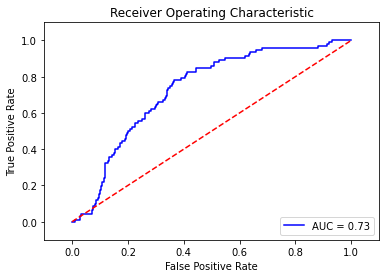

In [8]:
# Add code to evaluate predictions using ROC
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_proba)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Add Comment on usability


2. Train `LogisticRegression` with balanced class weights 
 1. Read the documentation to see what `class_weight` does
 2. Train a new model with the same `X_train` and `y_train` settting `class_weight` so the weights are balanced
 3. predict (hard and soft) on training and test features with .predict() and .predict_proba()
 4. evaluate model using confusion matrix (confusion_matrix) and its metrics (classification_report)
 5. evaluate model using ROC
 6. How does balancing class weights change any of the results? Why?
<br/><span style="color:red" float:right>[3 point]</span>

In [9]:
# Add code here to train the logistic regression with balanced weights

logreg = LogisticRegression(class_weight="balanced")
logreg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [10]:
# Add code to predict (hard and soft) on training and test features
y_train_pred = logreg.predict(X_train)
y_train_proba = logreg.predict_proba(X_train)[:,1]

y_test_pred = logreg.predict(X_test)
y_test_proba = logreg.predict_proba(X_test)[:,1]

In [11]:
# Add code to evaluate predictions using confusion matrix and its metrics

cm_train = metrics.confusion_matrix(y_train, y_train_pred)
print('Confusion matrix based on training data:')
print(cm_train)
print('\nConfusion matrix as an accuracy measure (test data):')
cm_test = metrics.confusion_matrix(y_test, y_test_pred)
print(cm_test)

from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

Confusion matrix based on training data:
[[639 291]
 [ 20  72]]

Confusion matrix as an accuracy measure (test data):
[[276 124]
 [ 15  23]]
              precision    recall  f1-score   support

       False       0.97      0.69      0.80       930
        True       0.20      0.78      0.32        92

    accuracy                           0.70      1022
   macro avg       0.58      0.73      0.56      1022
weighted avg       0.90      0.70      0.76      1022

              precision    recall  f1-score   support

       False       0.95      0.69      0.80       400
        True       0.16      0.61      0.25        38

    accuracy                           0.68       438
   macro avg       0.55      0.65      0.52       438
weighted avg       0.88      0.68      0.75       438



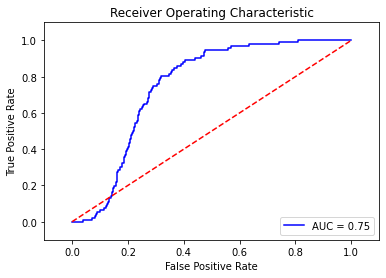

In [12]:
# Add code to evaluate predictions using ROC
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_proba)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Add Comment on the effect of weight balancing
You can see the model is better fitting, all of the indices have gone up in the balanced model. 

3. Use `LogisticRegressionCV` to train a cross-validation logistic regression.  The CV stands for cross-validation.
 1. train a cross-validation logistic regression
    - Use the same `X_train` and `y_train`.
    - You may want to use `random_state = 0` to make your results the same as others.
    - Set the `cv` parameter to 5.  5 is the default value.
    - Set `class_weight` so the weights are balanced
 2. predict (hard and soft) on training and test features with `.predict()` and `.predict_proba()`
 3. evaluate test and training predictions using confusion matrix (`confusion_matrix`) and its metrics (`classification_report`)
 4. evaluate test and training predictions using ROC
 5. comment on whether cross-validation makes a difference in the results. 
<br/><span style="color:red" float:right>[3 point]</span>

In [13]:
# Add code to train logistic regression cross-validation (cv = 5)
from sklearn.linear_model import LogisticRegressionCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)
logreg = LogisticRegressionCV(cv=5,class_weight="balanced")
logreg.fit(X_train, y_train)

LogisticRegressionCV(class_weight='balanced', cv=5)

In [14]:
# Add code to predict (hard and soft) on training and test features
y_train_pred = logreg.predict(X_train)
y_train_proba = logreg.predict_proba(X_train)[:,1]

y_test_pred = logreg.predict(X_test)
y_test_proba = logreg.predict_proba(X_test)[:,1]

In [15]:
# Add code to evaluate predictions using confusion matrix and its metrics

cm_train = metrics.confusion_matrix(y_train, y_train_pred)
print('Confusion matrix based on training data:')
print(cm_train)
print('\nConfusion matrix as an accuracy measure (test data):')
cm_test = metrics.confusion_matrix(y_test, y_test_pred)
print(cm_test)

from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

Confusion matrix based on training data:
[[640 290]
 [ 20  72]]

Confusion matrix as an accuracy measure (test data):
[[276 124]
 [ 10  28]]
              precision    recall  f1-score   support

       False       0.97      0.69      0.81       930
        True       0.20      0.78      0.32        92

    accuracy                           0.70      1022
   macro avg       0.58      0.74      0.56      1022
weighted avg       0.90      0.70      0.76      1022

              precision    recall  f1-score   support

       False       0.97      0.69      0.80       400
        True       0.18      0.74      0.29        38

    accuracy                           0.69       438
   macro avg       0.57      0.71      0.55       438
weighted avg       0.90      0.69      0.76       438



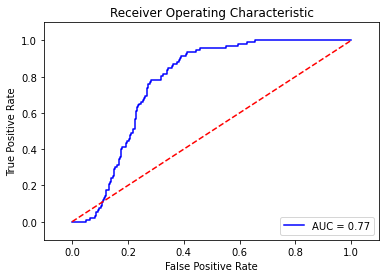

In [16]:
# Add code to evaluate predictions using ROC
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_proba)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Add comments on model evaluation and  cross-validation
When adding the cross-validation the model improved again. 

4. Increase the number of folds and train the CV model again:
 1. train a cross-validation logistic regression
    - Use the same `X_train` and `y_train`.
    - You may want to use `random_state = 0` to make your results the same as others.
    - Set the `cv` parameter to 10 
    - Set `class_weight` so the weights are balanced
 2. predict (hard and soft) on training and test features with `.predict()` and `.predict_proba()`
 3. evaluate test and training predictions using confusion matrix (`confusion_matrix`) and its metrics (`classification_report`)
 4. evaluate test and training predictions using ROC
 5. comment on whether cross-validation makes a difference in the results. 
<br/><span style="color:red" float:right>[2 point]</span>

In [17]:
# Add code to train logistic regression cross-validation (cv = 10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)
logreg = LogisticRegressionCV(cv=10,class_weight="balanced")
logreg.fit(X_train, y_train)

LogisticRegressionCV(class_weight='balanced', cv=10)

In [18]:
# Add code to predict (hard and soft) on training and test features
y_train_pred = logreg.predict(X_train)
y_train_proba = logreg.predict_proba(X_train)[:,1]

y_test_pred = logreg.predict(X_test)
y_test_proba = logreg.predict_proba(X_test)[:,1]

In [19]:
# Add code to evaluate model using confusion matrix and its metrics

cm_train = metrics.confusion_matrix(y_train, y_train_pred)
print('Confusion matrix based on training data:')
print(cm_train)
print('\nConfusion matrix as an accuracy measure (test data):')
cm_test = metrics.confusion_matrix(y_test, y_test_pred)
print(cm_test)

from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

Confusion matrix based on training data:
[[627 303]
 [ 17  75]]

Confusion matrix as an accuracy measure (test data):
[[271 129]
 [  9  29]]
              precision    recall  f1-score   support

       False       0.97      0.67      0.80       930
        True       0.20      0.82      0.32        92

    accuracy                           0.69      1022
   macro avg       0.59      0.74      0.56      1022
weighted avg       0.90      0.69      0.75      1022

              precision    recall  f1-score   support

       False       0.97      0.68      0.80       400
        True       0.18      0.76      0.30        38

    accuracy                           0.68       438
   macro avg       0.58      0.72      0.55       438
weighted avg       0.90      0.68      0.75       438



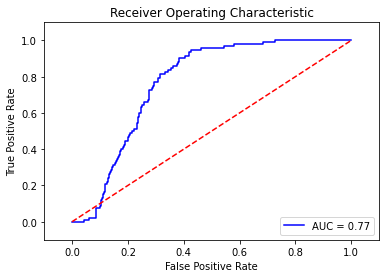

In [20]:
# Add code to evaluate model using ROC
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_proba)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Add comments on model evaluation and extended cross-validation
Increasing the cross-validation very marginally inproved the model. 

5. What was the cost of increasing the number of folds in terms of training run-time? <span style="color:red" float:right>[2 point]</span>

In [21]:
# Add code here to determine cost of increasing folds
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Start the timer
start_time = time.time()

# Create and fit the logistic regression model
logreg = LogisticRegressionCV(cv=5, class_weight="balanced")
logreg.fit(X_train, y_train)

# End the timer
end_time = time.time()

# Calculate the runtime
runtime = end_time - start_time
print("Runtime for cv 5: {:.2f} seconds".format(runtime))




# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Start the timer
start_time = time.time()

# Create and fit the logistic regression model
logreg = LogisticRegressionCV(cv=10, class_weight="balanced")
logreg.fit(X_train, y_train)

# End the timer
end_time = time.time()

# Calculate the runtime
runtime = end_time - start_time
print("Runtime for cv 10: {:.2f} seconds".format(runtime))


Runtime for cv 5: 3.13 seconds
Runtime for cv 10: 7.26 seconds


#### Add comments on training run-time here
By adding the increased CV it very marginally if at all improved the model and caused the runtime to increase. It seems like adding more CV has deminshed returns at this point.  

# End of assignment